Use your learned skills to perform a MLR on the dataset MLR_car_price.csv to predict the resales price of a car.

## Import relevant libraries ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cars = pd.read_csv("/Users/ilhaam.ahmed/Projects/intro_data_analysis_with_pandas/Phase 3/csv files/MLR_car_price.csv")

## Explore the data ##

In [2]:
cars.head(10)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
cars.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [4]:
cars.shape

(205, 26)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Correlation ##

Find out if there are any strong relationships between the variables.

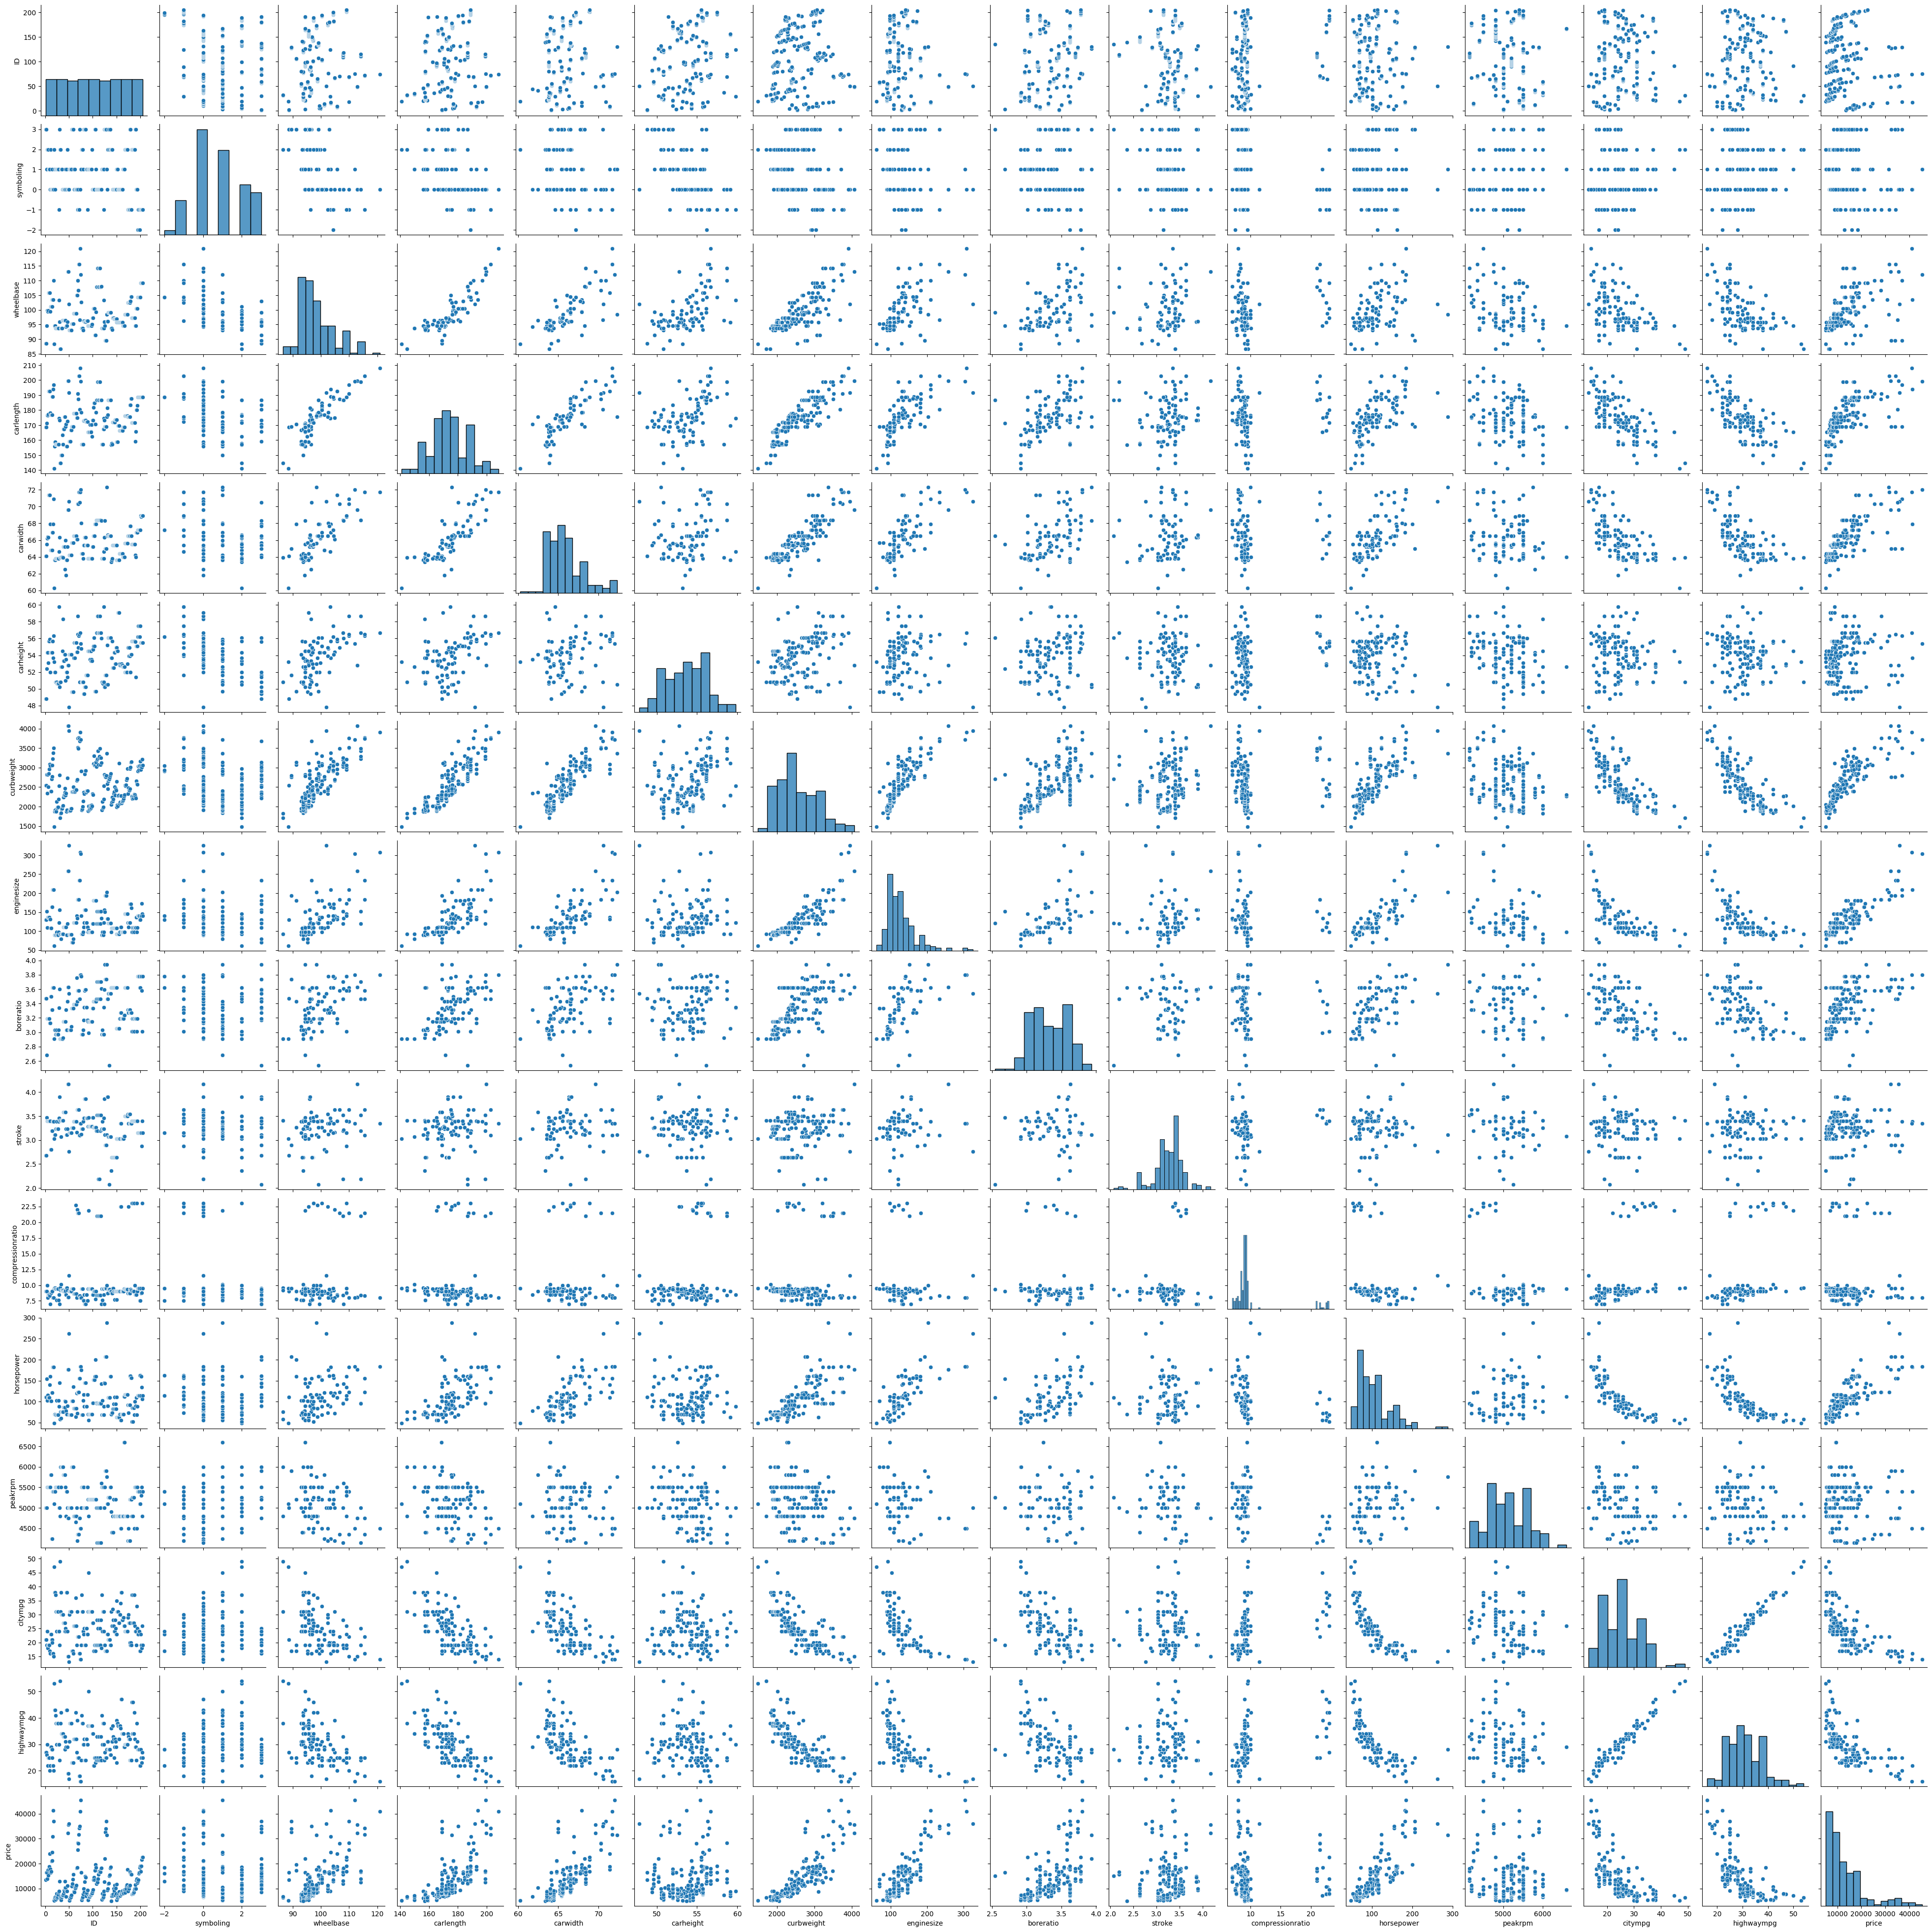

In [8]:
sns.pairplot(cars)

In [24]:
# We want to view only the float and integer datatypes so filter the dataframe to get these.

cars_filtered_dataframe = cars.select_dtypes(include=['float', 'int'])
cars_filtered_dataframe = pd.DataFrame(cars_filtered_dataframe)
cars_filtered_dataframe

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Now get the correlation of these

In [25]:
cars_filtered_dataframe.corr()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


Now filter this further by the stronger relationships

In [27]:
corr_matrix = cars_filtered_dataframe.corr().abs()
filtered_matrix = corr_matrix[corr_matrix > 0.4]
filtered_matrix

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symboling,NaN,1.000000,0.531954,NaN,NaN,0.541038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,NaN,0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,NaN,NaN,NaN,NaN,0.470414,0.544082,0.577816
carlength,NaN,NaN,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,NaN,NaN,0.552623,NaN,0.670909,0.704662,0.682920
carwidth,NaN,NaN,0.795144,0.841118,1.000000,NaN,0.867032,0.735433,0.559150,NaN,NaN,0.640732,NaN,0.642704,0.677218,0.759325
carheight,NaN,0.541038,0.589435,0.491029,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curbweight,NaN,NaN,0.776386,0.877728,0.867032,NaN,1.000000,0.850594,0.648480,NaN,NaN,0.750739,NaN,0.757414,0.797465,0.835305
enginesize,NaN,NaN,0.569329,0.683360,0.735433,NaN,0.850594,1.000000,0.583774,NaN,NaN,0.809769,NaN,0.653658,0.677470,0.874145
boreratio,NaN,NaN,0.488750,0.606454,0.559150,NaN,0.648480,0.583774,1.000000,NaN,NaN,0.573677,NaN,0.584532,0.587012,0.553173
stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


The above shows that ***price*** has positive relationships with ***wheelbase***, ***carlength***, ***carwidth***, ***curbweight***, ***enginesize***, ***boreratio***, ***horsepower***, ***citympg***, and lastly ***highwaympg***.

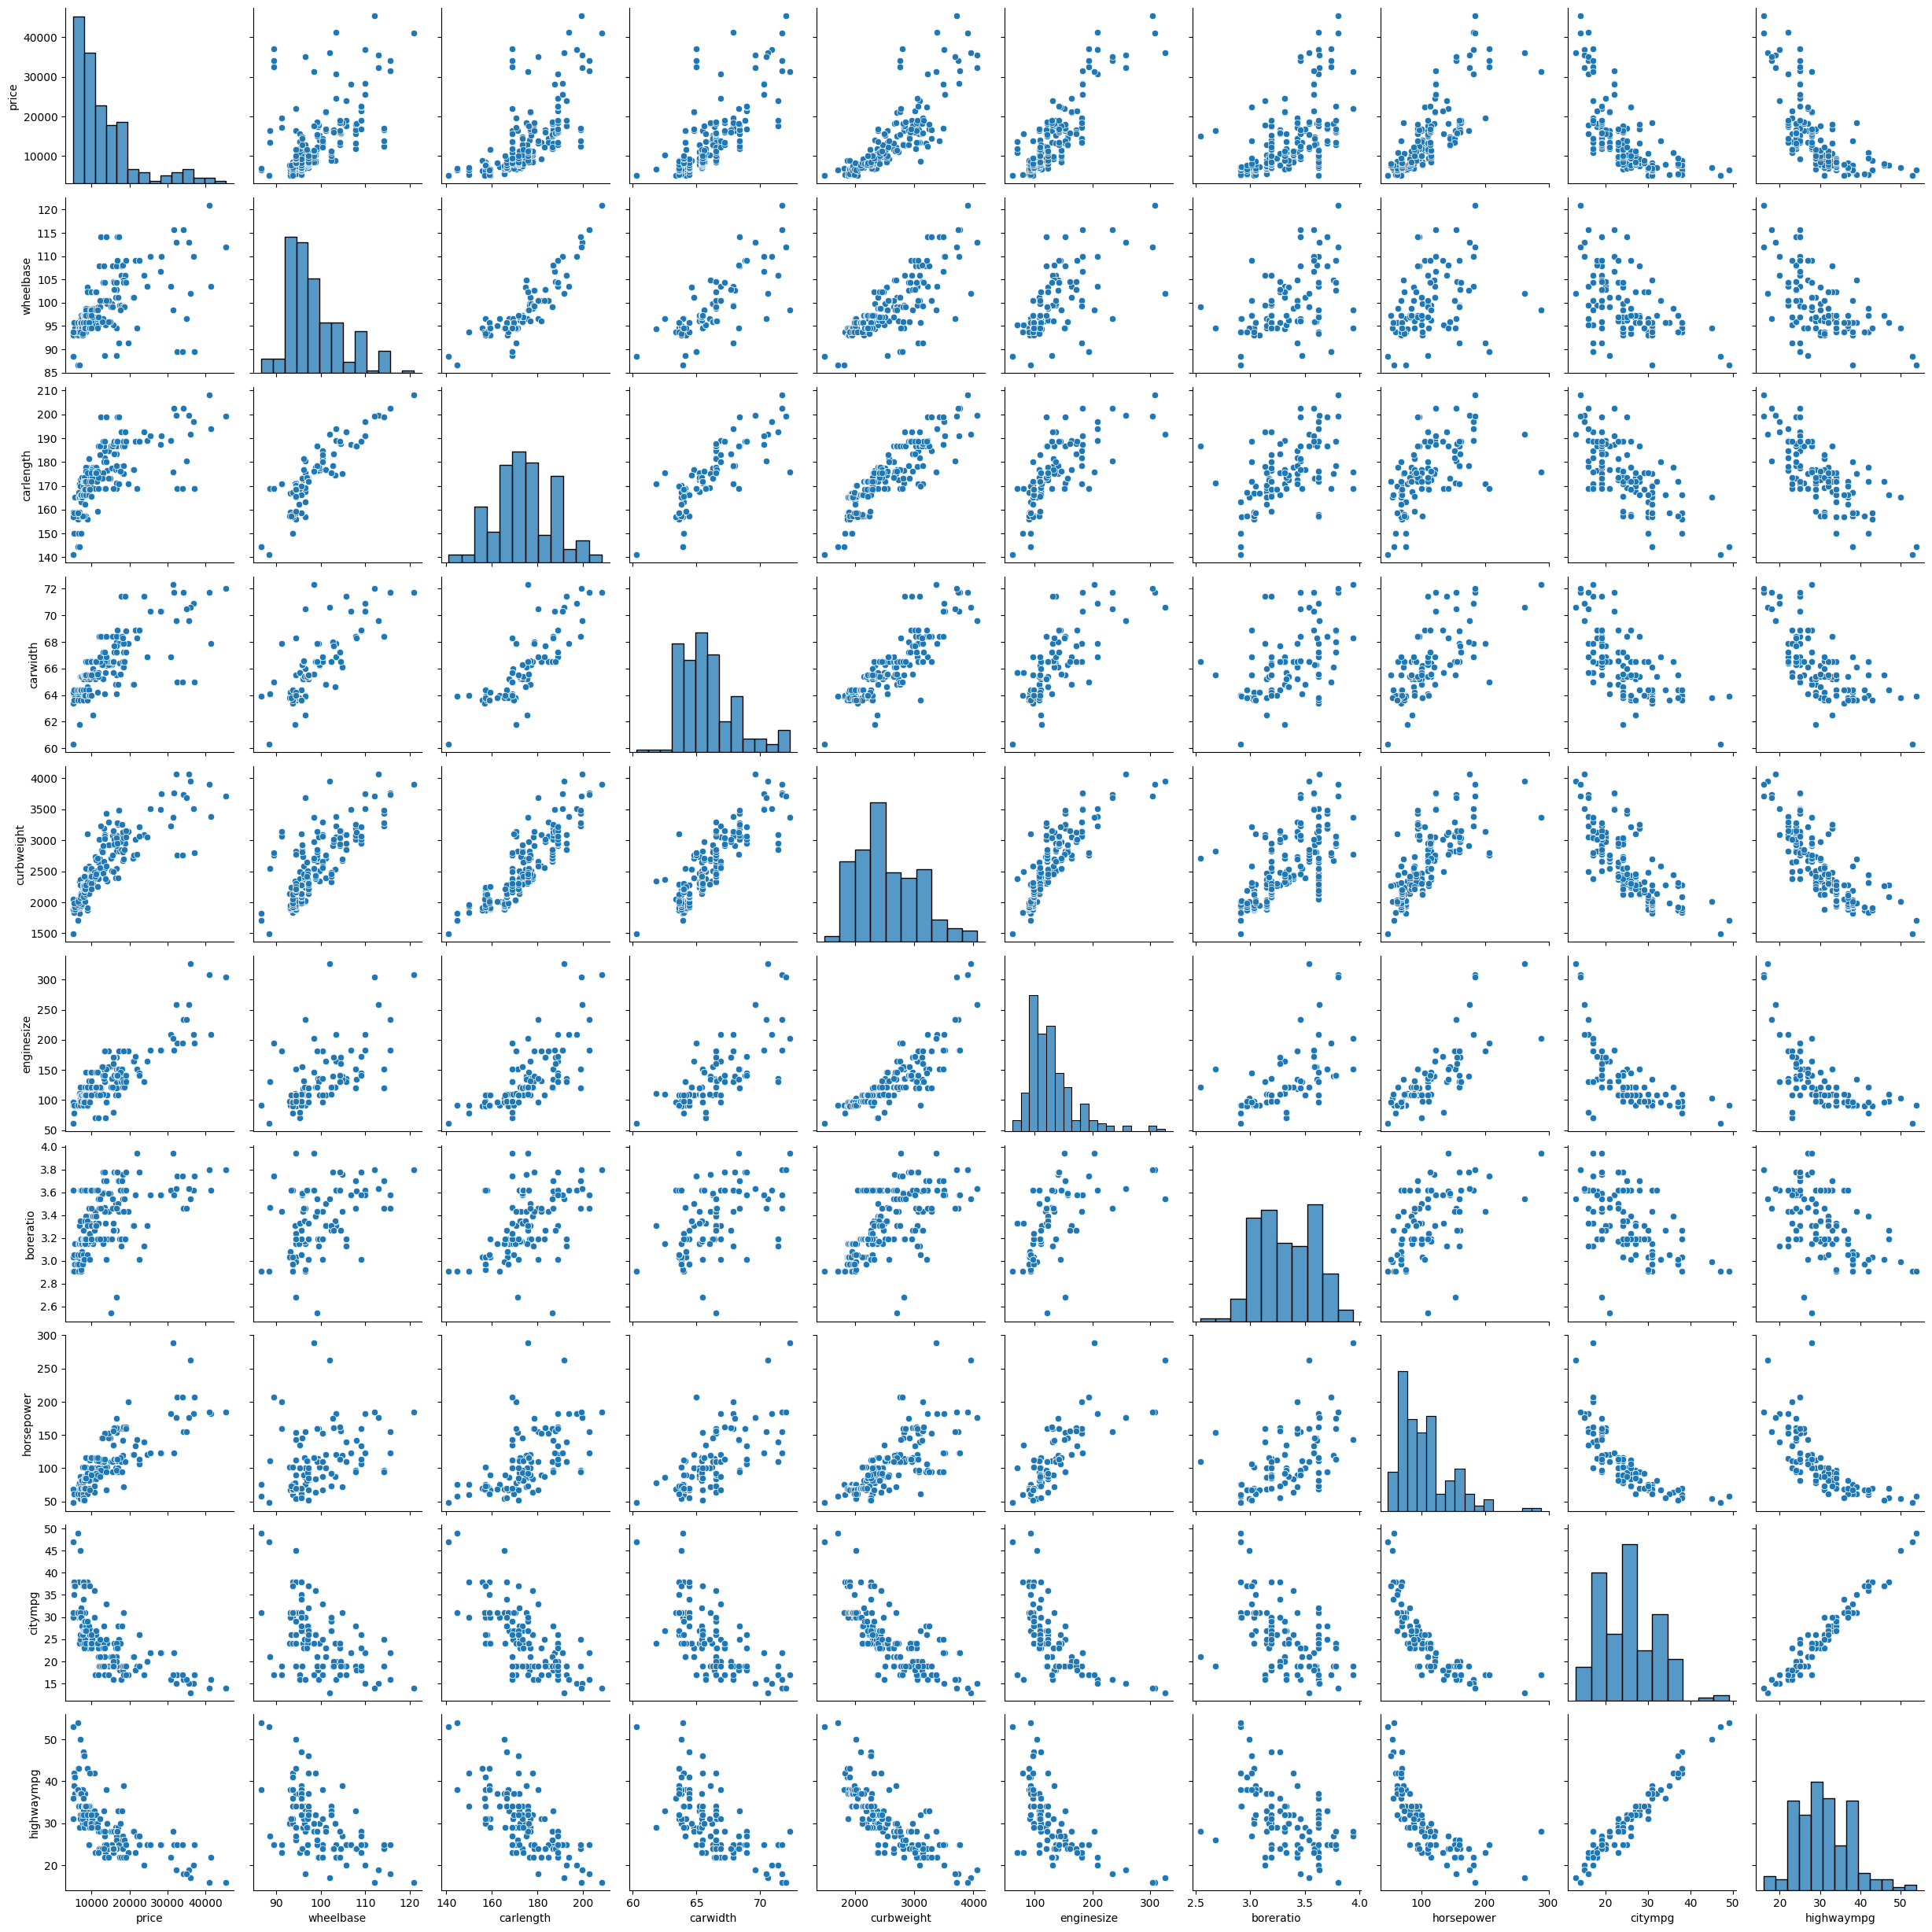

In [29]:
filtered_pairplot = cars[['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
sns.pairplot(filtered_pairplot)

In [34]:
# Checking the correlation

cars[['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']].corr()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
price,1.000000,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,-0.685751,-0.697599
wheelbase,0.577816,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,-0.470414,-0.544082
carlength,0.682920,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,-0.670909,-0.704662
carwidth,0.759325,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,-0.642704,-0.677218
curbweight,0.835305,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,-0.757414,-0.797465
enginesize,0.874145,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,-0.653658,-0.677470
boreratio,0.553173,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,-0.584532,-0.587012
horsepower,0.808139,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,-0.801456,-0.770544
citympg,-0.685751,-0.470414,-0.670909,-0.642704,-0.757414,-0.653658,-0.584532,-0.801456,1.000000,0.971337
highwaympg,-0.697599,-0.544082,-0.704662,-0.677218,-0.797465,-0.677470,-0.587012,-0.770544,0.971337,1.000000


Text(0, 0.5, 'wheelbase')

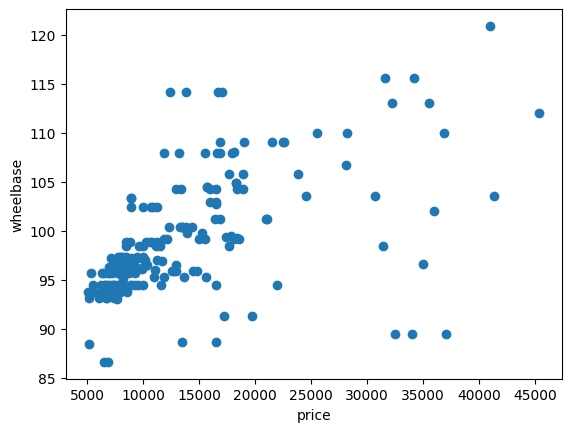

In [43]:
plt.scatter(cars['price'], cars['wheelbase'])
plt.xlabel("price")
plt.ylabel("wheelbase")

Text(0, 0.5, 'car length')

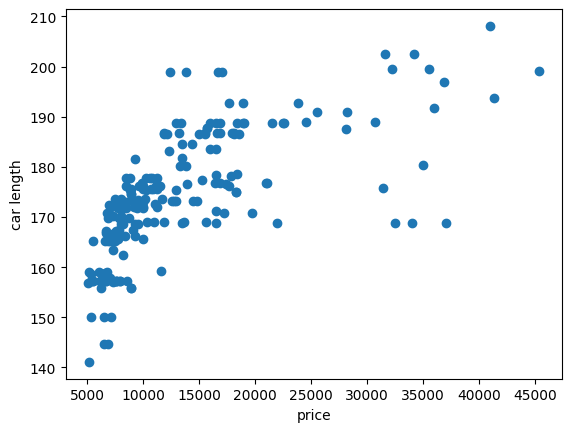

In [44]:
plt.scatter(cars['price'], cars['carlength'])
plt.xlabel("price")
plt.ylabel("car length")

Text(0, 0.5, 'car width')

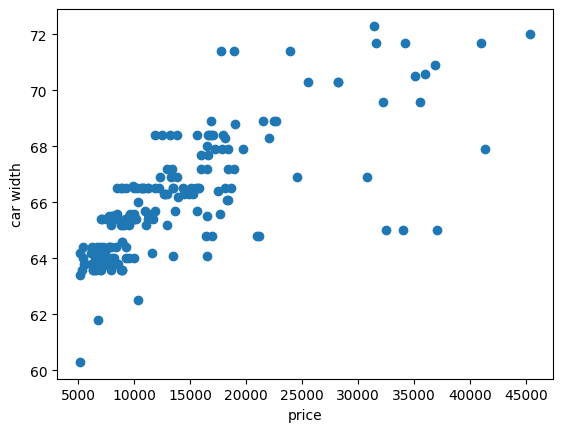

In [45]:
plt.scatter(cars['price'], cars['carwidth'])
plt.xlabel("price")
plt.ylabel("car width")

Text(0, 0.5, 'curbweight')

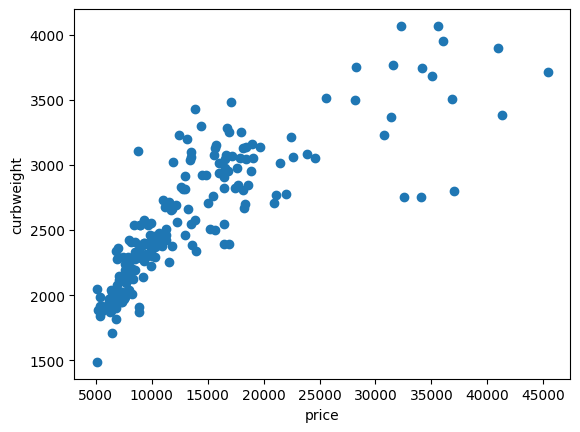

In [47]:
plt.scatter(cars['price'], cars['curbweight'])
plt.xlabel("price")
plt.ylabel("curbweight")

Text(0, 0.5, 'enginesize')

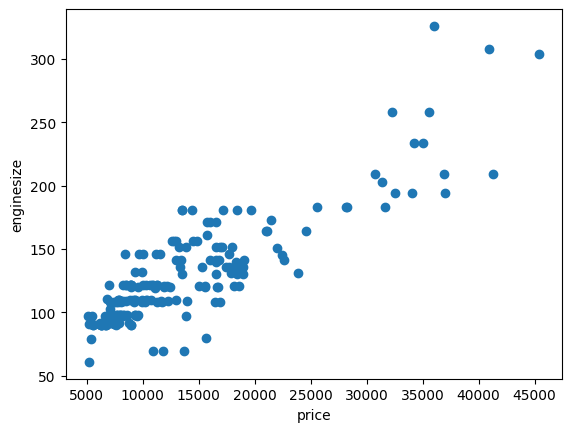

In [48]:
plt.scatter(cars['price'], cars['enginesize'])
plt.xlabel("price")
plt.ylabel("enginesize")

Text(0, 0.5, 'bore ratio')

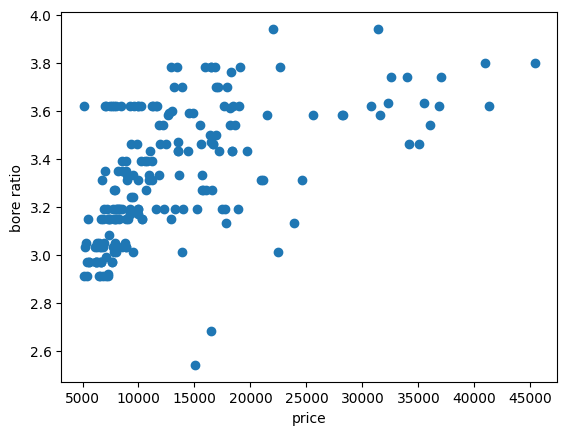

In [49]:
plt.scatter(cars['price'], cars['boreratio'])
plt.xlabel("price")
plt.ylabel("bore ratio")

Text(0, 0.5, 'horsepower')

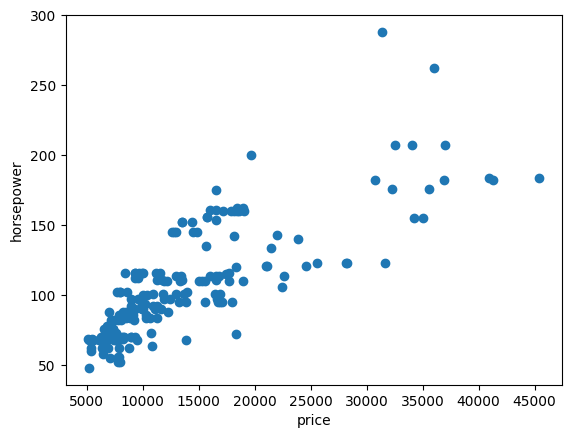

In [50]:
plt.scatter(cars['price'], cars['horsepower'])
plt.xlabel("price")
plt.ylabel("horsepower")

Text(0, 0.5, 'citympg')

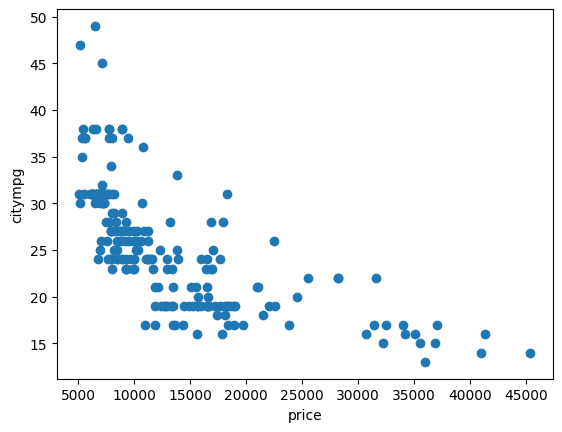

In [51]:
plt.scatter(cars['price'], cars['citympg'])
plt.xlabel("price")
plt.ylabel("citympg")

Text(0, 0.5, 'highway mpg')

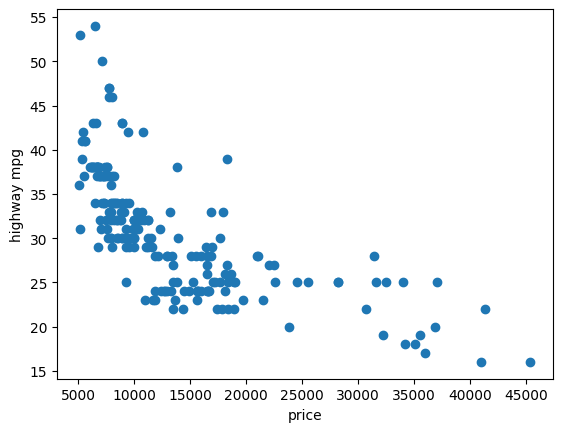

In [52]:
plt.scatter(cars['price'], cars['highwaympg'])
plt.xlabel("price")
plt.ylabel("highway mpg")

### Split the dataframe into train and test

In [36]:
train, test = train_test_split(
    cars,
    random_state= 13
)

In [37]:
train.shape

(153, 26)

In [38]:
test.shape

(52, 26)

### Train the model

In [39]:
# identify the independent and dependent variables

dependent_var = cars['price']
independent_var = cars[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']]
independent_var = sm.add_constant(independent_var)

# build the model
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     100.3
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.01e-68
Time:                        14:03:11   Log-Likelihood:                -1955.4
No. Observations:                 205   AIC:                             3931.
Df Residuals:                     195   BIC:                             3964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.322e+04   1.38e+04     -3.141      0.002   -7.04e+04   -1.61e+04
wheelbase    109.8953    101.743      1.080      0.281     -90.762     310.552
carlength    -57.8534     57.933     -0.999      0.319    -172.110      56.403
carwidth     532.4667    255.561      2.084      0.039      28.447    1036.486
curbweight     2.9178      1.651      1.767      0.079      -0.338       6.174
enginesize    83.6150     13.434      6.224      0.000      57.119     110.111
boreratio  -1140.4637   1212.508     -0.941      0.348   -3531.777    1250.850
horsepower    53.7536     15.447      3.480      0.001      23.290      84.217
citympg     -119.8146    185.536     -0.646      0.519    -485.729     246.100
highwaympg   122.8553    170.820      0.719      0.473    -214.036     459.746
==============================================================================
Omnibus:                       32.369   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.456
Skew:                           0.714   Prob(JB):                     6.79e-17
Kurtosis:                       5.584   Cond. No.                     1.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I can make the following observations based on the above:

1. The R-squared values are above 80% and both suggest that the model is a good fit.
2. The F-statistic and the probability suggest that the new model is better than the base model in a statistically significant way.
3. Some of our p-values are above 0.05 suggesting that the observed data is not statisticaslly significant and likely to have occured by chance. Therefore it won't be important to consider those independent variables.
4. We can also see from the high condition number (1.50e+05) that there may be issues with multicollinearity among the independent variables. This means that the independent variables may be highly correlated with each other, which can lead to unreliable coefficient estimates and less accurate predictions.


## Retrain the model 

I will retrain the model takeing out the independent variables that are causing the multicollineary issues.

In [72]:
# identify the independent and dependent variables

dependent_var = cars['price']
independent_var = cars[['enginesize', 'horsepower']]
independent_var = sm.add_constant(independent_var)

# build the model
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     387.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.93e-70
Time:                        14:42:21   Log-Likelihood:                -1970.9
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     202   BIC:                             3958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8389.7331    822.532    -10.200      0.000      -1e+04   -6767.882
enginesize   122.4470     10.458     11.709      0.000     101.826     143.068
horsepower    58.8474     11.013      5.344      0.000      37.132      80.562
==============================================================================
Omnibus:                       10.756   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.522
Skew:                           0.304   Prob(JB):                     0.000258
Kurtosis:                       4.251   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Equation:

y = 848.6984*[carwidth] + 94.9419*[enginesize] + 52.8026*[horsepower] - 60210

Points to be made:
- The R-squared values are pretty high and indicate that the model is a good fit, so does the F-statistic and the propability of the F-statistic.
- The p-values are all now good and suggest the data is statistically significant
- However the condition number is still quite large which can indicate multicollinearity.

## Predict the data for test set and compare.

In [75]:
predicted = model.predict(
    sm.add_constant(test[['enginesize', 'horsepower']])
)

In [76]:
predicted

104    23188.764371
90      7458.917804
23      9612.511543
143    10366.202334
171    16313.832238
150     6523.932575
65     15814.539826
114    15812.718481
33      7347.796479
101    22717.984998
189    10253.259663
30      6288.542888
70     21256.303801
172    16313.832238
95      7548.099609
134    12899.572296
106    23188.764371
193    10135.564820
108    15812.718481
163     7729.394048
177    11962.765721
132    12899.572296
68     21256.303801
7      14736.277543
128    27546.404407
89      7548.099609
127    27546.404407
102    22717.984998
84     19244.877633
110    15812.718481
79      9612.511543
100    12012.108797
116    15812.718481
118     6632.123072
10     10778.134286
94      7548.099609
13     18812.115644
42     10964.180897
15     27911.924111
124    19244.877633
200    15583.902312
111    11894.413953
96      7548.099609
151     6523.932575
158     8374.894341
97      7548.099609
115    12012.108797
69     21256.303801
145    11366.608503
148     9660.033273


## Is the model a good fit for our test data?

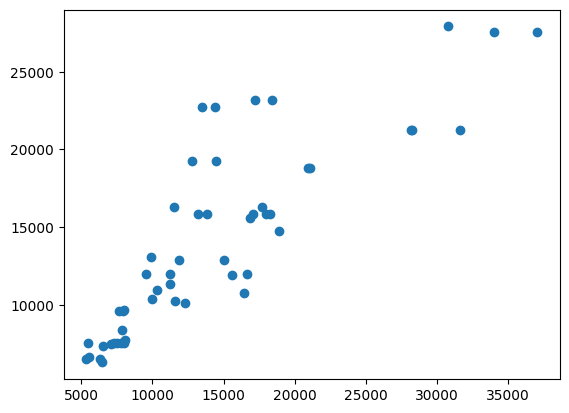

In [77]:
plt.scatter(test['price'], predicted)

In [78]:
metrics.r2_score(test['price'], predicted)

0.7333330025735663

## Rebuild the whole model

In [82]:
# identify the independent and dependent variables

dependent_var = cars['price']
independent_var = cars[['enginesize', 'horsepower']]
independent_var = sm.add_constant(independent_var)

# build the model
model = sm.OLS(
    dependent_var,
    independent_var
).fit()

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     387.7
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.93e-70
Time:                        14:43:01   Log-Likelihood:                -1970.9
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     202   BIC:                             3958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8389.7331    822.532    -10.200      0.000      -1e+04   -6767.882
enginesize   122.4470     10.458     11.709      0.000     101.826     143.068
horsepower    58.8474     11.013      5.344      0.000      37.132      80.562
==============================================================================
Omnibus:                       10.756   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.522
Skew:                           0.304   Prob(JB):                     0.000258
Kurtosis:                       4.251   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Make a prediction

In [84]:
# Mean for each
print(cars['enginesize'].mean(),
cars['horsepower'].mean(),
cars['price'].mean())

126.90731707317073 104.1170731707317 13276.710570731706


In [85]:
# predicting price based on a engine size and horsepower.

price_pred = model.predict([1, 127, 104])
price_pred[0]

13281.169864351463